In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

#  **Portfolio Project Data Analysis using Python**
Project portfolio from this data i need to extract some information to be useful insight. Here are questions to be answered
1. Overall Performance
2. Product Performance and Seasonal Trends
3. Regional Analysis
4. Customer Segmentation
5. Profitability Analysis

In [2]:
#First create Dataframe using excel data and Clean the data

data = pd.read_excel('Adidas US Sales Datasets.xlsx',names=['Retailer','Retailer ID','Invoice Date','Region','State','City','Product','Price per Unit','Units Sold','Total Sales','Operating Profit','Operating Margin','Sales Method'])
data = data.shift(-4).reset_index().drop('index',axis=1)
data = data.drop(data.tail(4).index)
data.to_csv('cleaned_sales_adidas.csv')


In [4]:
df = pd.read_csv('cleaned_sales_adidas.csv')
df = df.drop('Unnamed: 0',axis=1)
df['Invoice Date'] = pd.to_datetime(df['Invoice Date'])
df['Total Sales'] = df['Total Sales'].astype('int')
df['Operating Profit'] = df['Operating Profit'].astype('int')

# 1. Overall Performance
* How has company's total revenue over the past year?
* Are there any patterns or anomalies?

In [5]:
import matplotlib.pyplot as plt



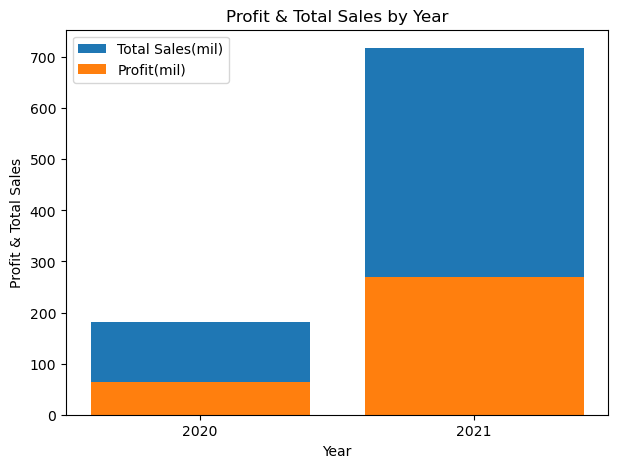

In [12]:
revenue = df.groupby(df['Invoice Date'].dt.year).agg({'Total Sales':'sum','Operating Profit':'sum'}).reset_index()
revenue['total_sales_in_million'] = round(revenue['Total Sales']/1000000,2)
revenue['total_profit_in_million'] = round(revenue['Operating Profit']/1000000,2)

plt.figure(figsize=(7,5))
plt.title('Profit & Total Sales by Year')
plt.xlabel('Year')
plt.ylabel('Profit & Total Sales')
plt.bar('Invoice Date','total_sales_in_million',data=revenue, tick_label=[2020,2021])
plt.bar('Invoice Date','total_profit_in_million',data=revenue, tick_label=[2020,2021])
plt.legend(['Total Sales(mil)','Profit(mil)'])
plt.savefig('Profit & Total Sales by Year.png',bbox_inches='tight',dpi=300)
plt.show()

In [7]:
revenue[['Invoice Date','total_sales_in_million','total_profit_in_million']]

,Invoice Date,total_sales_in_million,total_profit_in_million
0,2020,182.08,63.38
1,2021,717.82,268.76


From the bar chart above can be seen that there is growth in total sales and operating profit by pretty huge margin.
* orange bar for profit
* blue bar for total sales

# 2. Product Performance and Seasonal Trends
* Which products are top sellers in terms of revenue and quantity sold?
* Are there any products that have significant drop recently?

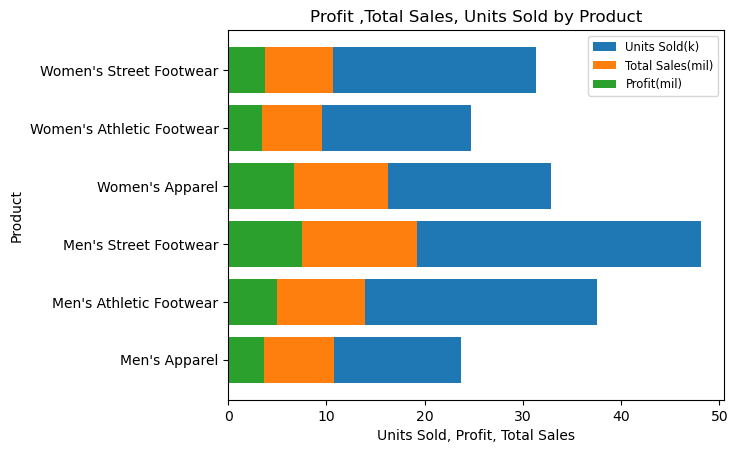

In [13]:
product = df.groupby([df['Invoice Date'].dt.strftime('%Y-%m'),'Product']).agg({'Total Sales':'sum','Operating Profit':'sum','Units Sold':'sum'}).reset_index()
product['total_sales_in_million'] = round(product['Total Sales']/1000000,2)
product['total_profit_in_million'] = round(product['Operating Profit']/1000000,2)
product['unit_sold_k'] = product['Units Sold']/1000

plt.title('Profit ,Total Sales, Units Sold by Product')
plt.xlabel('Units Sold, Profit, Total Sales')
plt.ylabel('Product')
plt.barh('Product','unit_sold_k',data=product)
plt.barh('Product','total_sales_in_million',data=product)
plt.barh('Product','total_profit_in_million',data=product)
plt.legend(['Units Sold(k)', 'Total Sales(mil)', 'Profit(mil)'],fontsize='small')
plt.savefig('Profit ,Total Sales, Units Sold by Product.png',bbox_inches='tight',dpi=300)
plt.show()


Chart above shows top sellers product in terms of units sold and Profit made is Men's Street Footwear followed by Men's Athletic Footwear. This table below will show the top 5 sales of those product.

In [9]:
product[['Product','unit_sold_k','total_sales_in_million','total_profit_in_million']].head(5).sort_values('unit_sold_k',ascending=False)

,Product,unit_sold_k,total_sales_in_million,total_profit_in_million
2,Men's Street Footwear,11.919,3.86,1.83
3,Women's Apparel,8.489,3.07,0.74
1,Men's Athletic Footwear,7.791,2.64,0.76
4,Women's Athletic Footwear,6.261,1.99,0.71
0,Men's Apparel,5.902,2.29,0.86


In [10]:
men_apparel = product.loc[product['Product']=="Men's Apparel",['Invoice Date','unit_sold_k','total_sales_in_million','total_profit_in_million']]
men_ath_footwear = product.loc[product['Product']=="Men's Athletic Footwear",['Invoice Date','unit_sold_k','total_sales_in_million','total_profit_in_million']]
men_street_footwear = product.loc[product['Product']=="Men's Street Footwear",['Invoice Date','unit_sold_k','total_sales_in_million','total_profit_in_million']]
women_apparel = product.loc[product['Product']=="Women's Apparel",['Invoice Date','unit_sold_k','total_sales_in_million','total_profit_in_million']]
women_ath_footwear = product.loc[product['Product']=="Women's Athletic Footwear",['Invoice Date','unit_sold_k','total_sales_in_million','total_profit_in_million']]
women_street_footwear = product.loc[product['Product']=="Women's Street Footwear",['Invoice Date','unit_sold_k','total_sales_in_million','total_profit_in_million']]

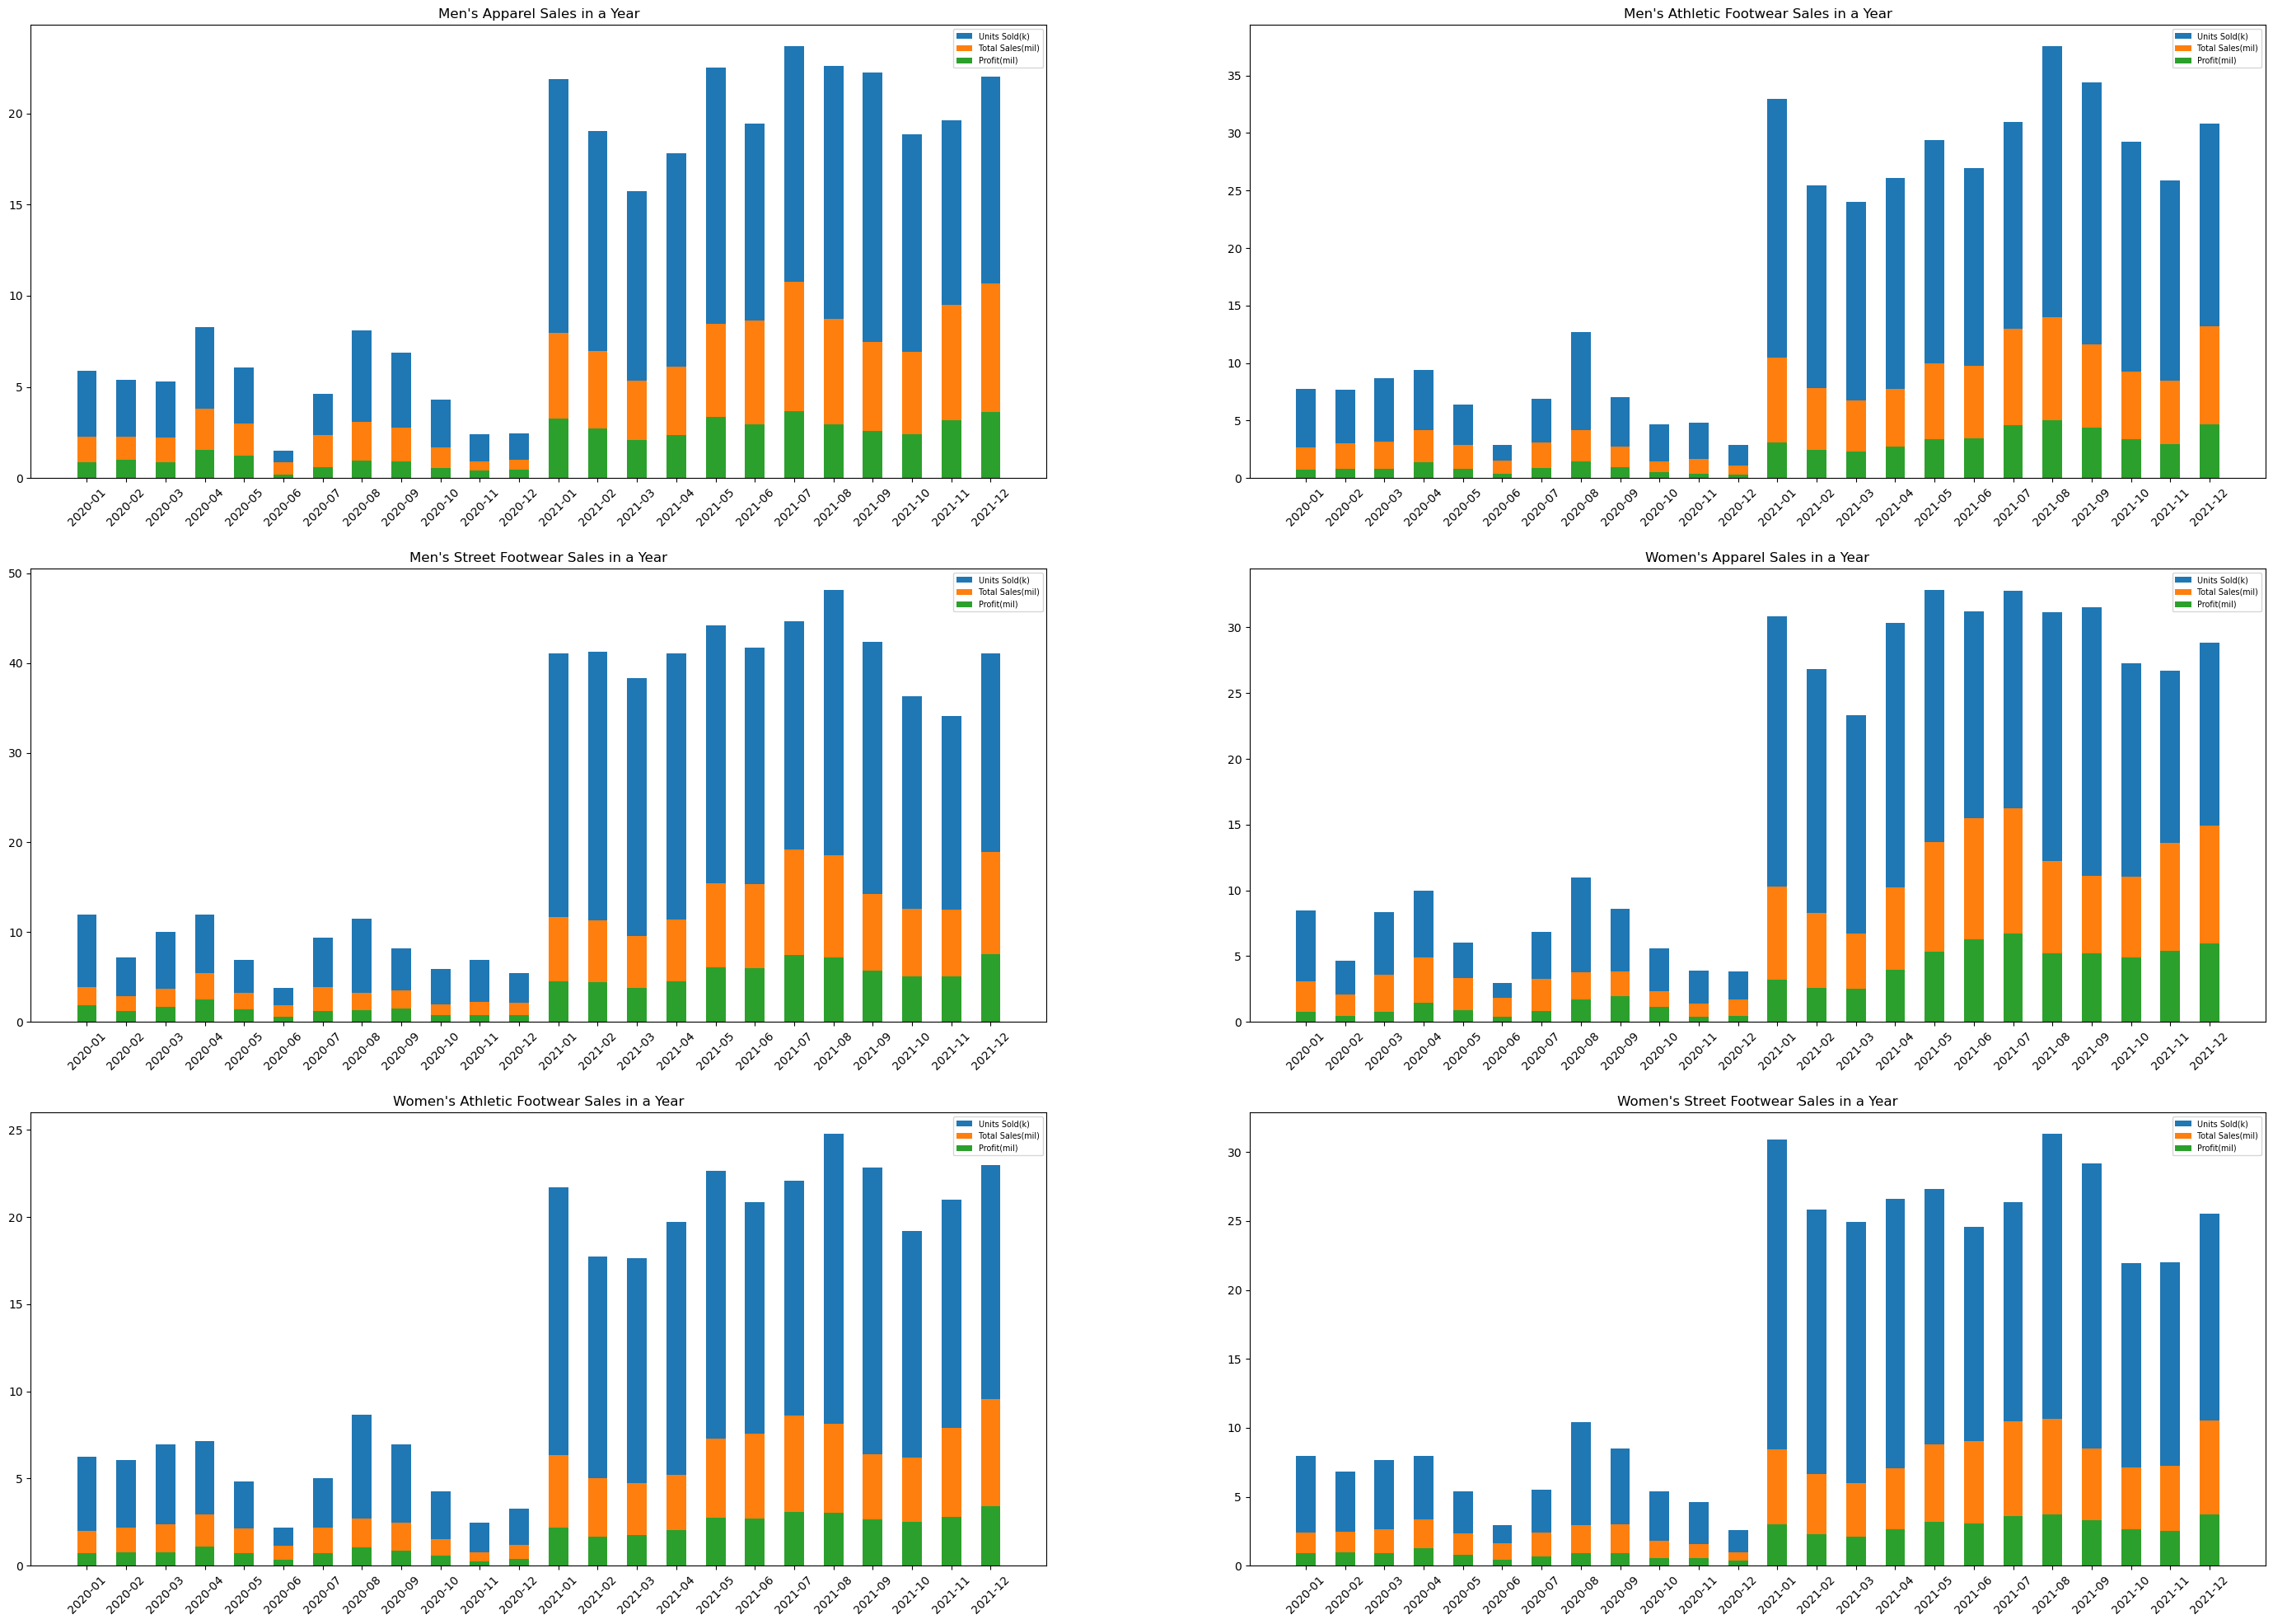

In [14]:
plt.figure(1,figsize=(35,50))
plt.subplot(621)
plt.title('Men\'s Apparel Sales in a Year')
plt.xticks(rotation=45)
plt.bar('Invoice Date','unit_sold_k',width = .5,data=men_apparel)
plt.bar('Invoice Date','total_sales_in_million',width = .5,data=men_apparel)
plt.bar('Invoice Date','total_profit_in_million',width = .5,data=men_apparel)
plt.legend(['Units Sold(k)', 'Total Sales(mil)', 'Profit(mil)'],fontsize='x-small')

plt.subplot(622)
plt.xticks(rotation=45)
plt.title('Men\'s Athletic Footwear Sales in a Year')
plt.bar('Invoice Date','unit_sold_k',width = .5,data=men_ath_footwear)
plt.bar('Invoice Date','total_sales_in_million',width = .5,data=men_ath_footwear)
plt.bar('Invoice Date','total_profit_in_million',width = .5,data=men_ath_footwear)
plt.legend(['Units Sold(k)', 'Total Sales(mil)', 'Profit(mil)'],fontsize='x-small')

plt.subplot(623)
plt.xticks(rotation=45)
plt.title('Men\'s Street Footwear Sales in a Year')
plt.bar('Invoice Date','unit_sold_k',width = .5,data=men_street_footwear)
plt.bar('Invoice Date','total_sales_in_million',width = .5,data=men_street_footwear)
plt.bar('Invoice Date','total_profit_in_million',width = .5,data=men_street_footwear)
plt.legend(['Units Sold(k)', 'Total Sales(mil)', 'Profit(mil)'],fontsize='x-small')

plt.subplot(624)
plt.title('Women\'s Apparel Sales in a Year')
plt.xticks(rotation=45)
plt.bar('Invoice Date','unit_sold_k',width = .5,data=women_apparel)
plt.bar('Invoice Date','total_sales_in_million',width = .5,data=women_apparel)
plt.bar('Invoice Date','total_profit_in_million',width = .5,data=women_apparel)
plt.legend(['Units Sold(k)', 'Total Sales(mil)', 'Profit(mil)'],fontsize='x-small')

plt.subplot(625)
plt.xticks(rotation=45)
plt.title('Women\'s Athletic Footwear Sales in a Year')
plt.bar('Invoice Date','unit_sold_k',width = .5,data=women_ath_footwear)
plt.bar('Invoice Date','total_sales_in_million',width = .5,data=women_ath_footwear)
plt.bar('Invoice Date','total_profit_in_million',width = .5,data=women_ath_footwear)
plt.legend(['Units Sold(k)', 'Total Sales(mil)', 'Profit(mil)'],fontsize='x-small')

plt.subplot(626)
plt.xticks(rotation=45)
plt.title('Women\'s Street Footwear Sales in a Year')
plt.bar('Invoice Date','unit_sold_k',width = .5,data=women_street_footwear)
plt.bar('Invoice Date','total_sales_in_million',width = .5,data=women_street_footwear)
plt.bar('Invoice Date','total_profit_in_million',width = .5,data=women_street_footwear)
plt.legend(['Units Sold(k)', 'Total Sales(mil)', 'Profit(mil)'],fontsize='x-small')

plt.savefig('Men and Women Product by Time.png',bbox_inches='tight',dpi=300)
plt.show()

Based on the graph above it shows that each category number of unit sold started with high rise in 2021 before rise to highest sales in August(Except for Women's Street Footwear) and drop again from there until the November. On the other hand the profit shows relatively stable across the year 2021.

# 3. Regional Analysis
* variations sales across different regions or locations?
* Are there any regions that standout in terms of sales performance?

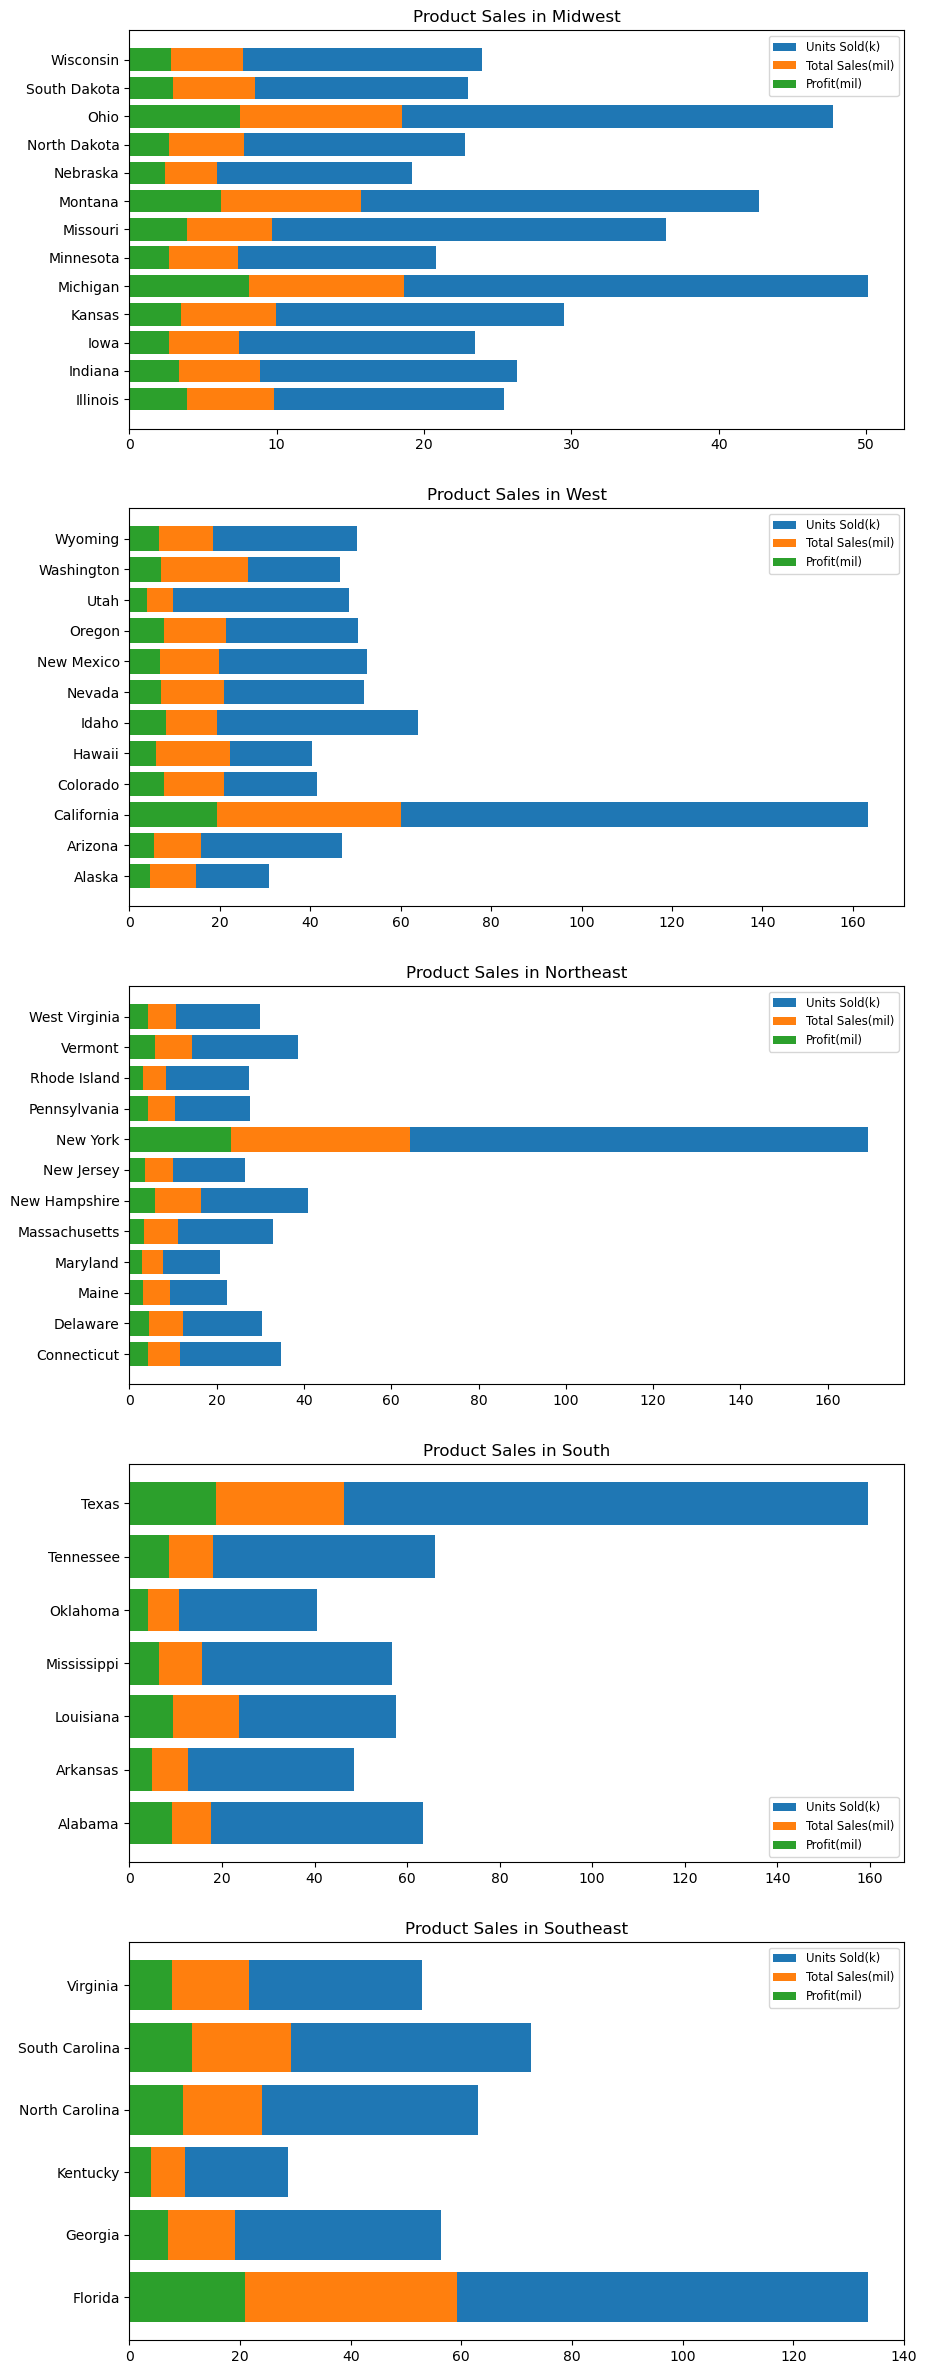

In [15]:
region = df.groupby(['Region','State']).agg({'Total Sales':'sum','Operating Profit':'sum','Units Sold':'sum'}).reset_index()
region['total_sales_in_million'] = round(region['Total Sales']/1000000,2)
region['total_profit_in_million'] = round(region['Operating Profit']/1000000,2)
region['unit_sold_k'] = region['Units Sold']/1000

midwest = region[region['Region']=='Midwest']
northeast = region[region['Region']=='Northeast']
south = region[region['Region']=='South']
west = region[region['Region']=='West']
southeast = region[region['Region']=='Southeast']

plt.figure(1,figsize=(10,30))
plt.subplot(511)
plt.title('Product Sales in Midwest')
plt.barh('State','unit_sold_k',data=midwest)
plt.barh('State','total_sales_in_million',data=midwest)
plt.barh('State','total_profit_in_million',data=midwest)
plt.legend(['Units Sold(k)', 'Total Sales(mil)', 'Profit(mil)'],fontsize='small')

plt.subplot(512)
plt.title('Product Sales in West')
plt.barh('State','unit_sold_k',data=west)
plt.barh('State','total_sales_in_million',data=west)
plt.barh('State','total_profit_in_million',data=west)
plt.legend(['Units Sold(k)', 'Total Sales(mil)', 'Profit(mil)'],fontsize='small')

plt.subplot(513)
plt.title('Product Sales in Northeast')
plt.barh('State','unit_sold_k',data=northeast)
plt.barh('State','total_sales_in_million',data=northeast)
plt.barh('State','total_profit_in_million',data=northeast)
plt.legend(['Units Sold(k)', 'Total Sales(mil)', 'Profit(mil)'],fontsize='small')

plt.subplot(514)
plt.title('Product Sales in South')
plt.barh('State','unit_sold_k',data=south)
plt.barh('State','total_sales_in_million',data=south)
plt.barh('State','total_profit_in_million',data=south)
plt.legend(['Units Sold(k)', 'Total Sales(mil)', 'Profit(mil)'],fontsize='small')

plt.subplot(515)
plt.title('Product Sales in Southeast')
plt.barh('State','unit_sold_k',data=southeast)
plt.barh('State','total_sales_in_million',data=southeast)
plt.barh('State','total_profit_in_million',data=southeast)
plt.legend(['Units Sold(k)', 'Total Sales(mil)', 'Profit(mil)'],fontsize='small')

plt.savefig('Sales by Region.png',bbox_inches='tight',dpi=300)
plt.show()

So those are the sales performance all the state of each region.
* For Midwest Region the standout state are Michigan and Ohio
* For West Region the standout state is by far California
* For Northeast Region the standout state is an obvious New York
* For South Region the standout state is Texas
* For Southeast Region the standout state is Florida\
Next I will compare each region sales performance

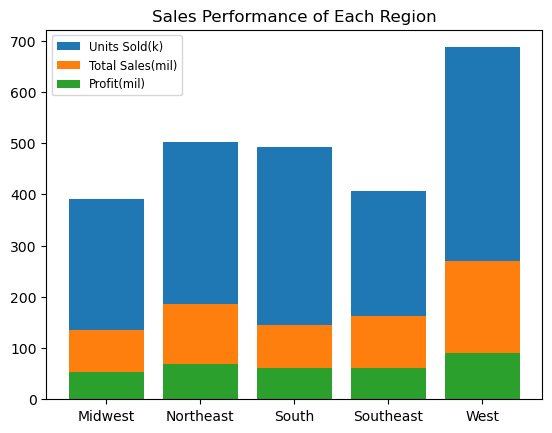

In [16]:
regions = region.groupby('Region').agg({'unit_sold_k':'sum','total_sales_in_million':'sum','total_profit_in_million':'sum'}).reset_index()
plt.title('Sales Performance of Each Region')
plt.bar('Region','unit_sold_k',data=regions)
plt.bar('Region','total_sales_in_million',data=regions)
plt.bar('Region','total_profit_in_million',data=regions)
plt.legend(['Units Sold(k)', 'Total Sales(mil)', 'Profit(mil)'],fontsize='small')
plt.savefig('Sales Performance each Region.png',bbox_inches='tight',dpi=300)
plt.show()

So from the chart above can be seen that West Region has the higher units sold, total sales and profit generated.

# 4. Customer Segmentation
* Identify Customer segment based on purchasing behavior?
* What are the Characteristic of the segments?\
It's practically hard to answer those questions due to the lack of data provided in the dataframe but i still can provide some customer segment based on Sales Method and the Product for example Men's products most likely to be bought by Men and as well as for Women's product, although those are not always the case but that can help segmentation.

In [18]:
df['customer'] = np.where(df['Product'].str.contains('Men'),'Men','Women')


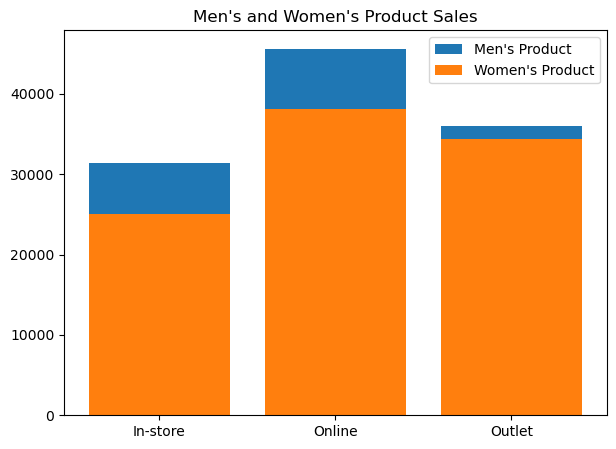

In [19]:
cust_segment = df.groupby(['Sales Method','customer',df['Invoice Date'].dt.strftime('%Y-%m')]).agg({'Total Sales':'sum','Operating Profit':'sum','Units Sold':'sum'}).reset_index()
cust_men = cust_segment.loc[cust_segment['customer']=='Men',['Sales Method','Units Sold']]
cust_women = cust_segment.loc[cust_segment['customer']=='Women',['Sales Method','Units Sold']]
in_store_men = cust_segment.loc[(cust_segment['Sales Method']=='In-store')&(cust_segment['customer']=='Men'),['Invoice Date','customer','Units Sold']]
in_store_women = cust_segment.loc[(cust_segment['Sales Method']=='In-store')&(cust_segment['customer']=='Women'),['Invoice Date','customer','Units Sold']]
online_men = cust_segment.loc[(cust_segment['Sales Method']=='Online')&(cust_segment['customer']=='Men'),['Invoice Date','customer','Units Sold']]
online_women = cust_segment.loc[(cust_segment['Sales Method']=='Online')&(cust_segment['customer']=='Women'),['Invoice Date','customer','Units Sold']]
outlet_men = cust_segment.loc[(cust_segment['Sales Method']=='Outlet')&(cust_segment['customer']=='Men'),['Invoice Date','customer','Units Sold']]
outlet_women = cust_segment.loc[(cust_segment['Sales Method']=='Outlet')&(cust_segment['customer']=='Women'),['Invoice Date','customer','Units Sold']]

plt.figure(1,figsize=(7,5))
plt.title('Men\'s and Women\'s Product Sales')
plt.bar('Sales Method','Units Sold',data=cust_men)
plt.bar('Sales Method','Units Sold',data=cust_women)
plt.legend(['Men\'s Product','Women\'s Product'])
plt.savefig('Sales Method Performance.png',bbox_inches='tight',dpi=300)
plt.show()

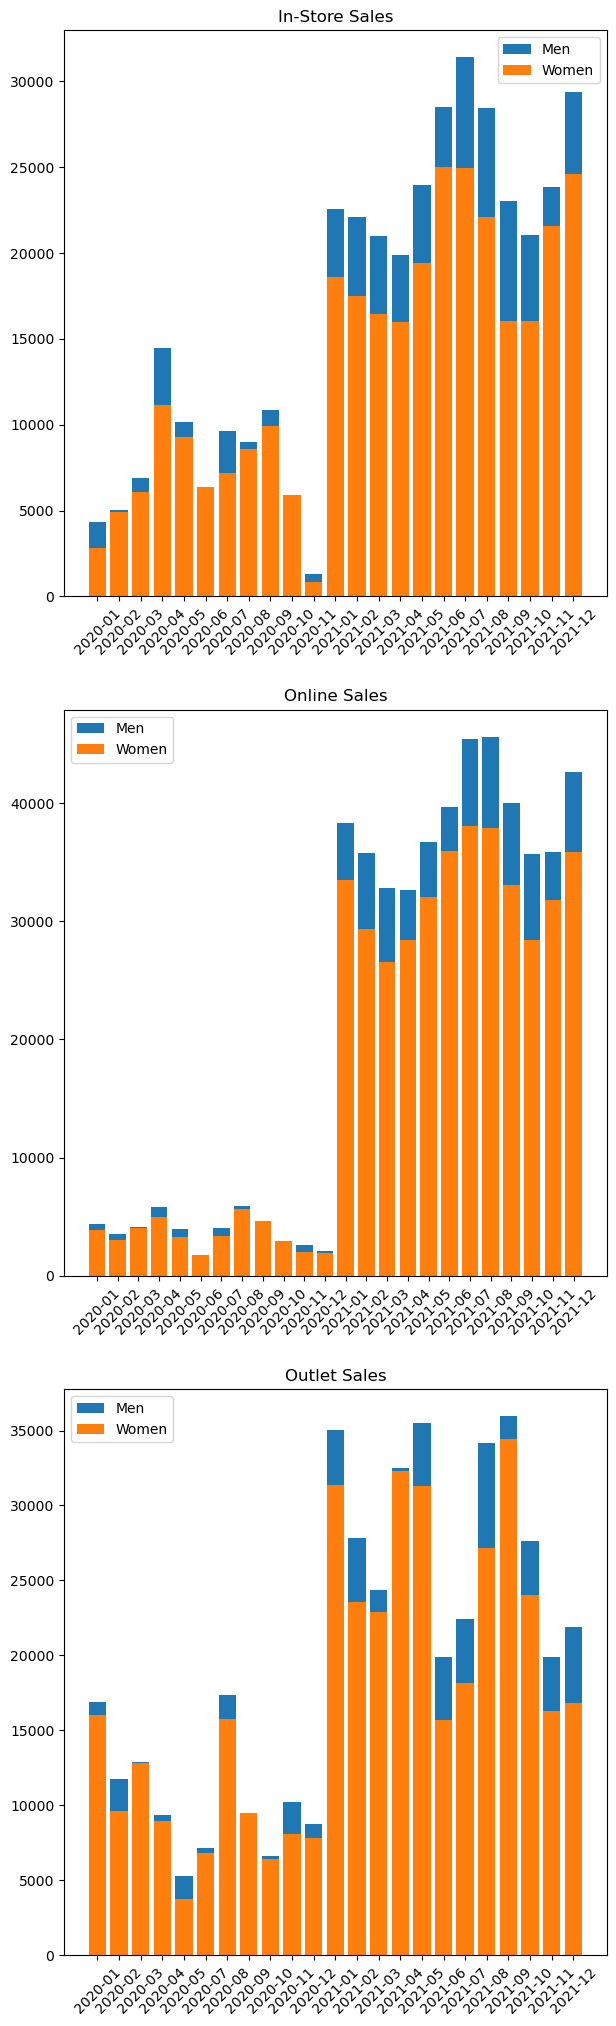

In [20]:
plt.figure(1,figsize=(7,25))
plt.subplot(311)
plt.title('In-Store Sales')
plt.bar('Invoice Date','Units Sold',data=in_store_men)
plt.bar('Invoice Date','Units Sold',data=in_store_women)
plt.xticks(rotation=45)
plt.legend(['Men','Women'])
plt.subplot(312)
plt.title('Online Sales')
plt.bar('Invoice Date','Units Sold',data=online_men)
plt.bar('Invoice Date','Units Sold',data=online_women)
plt.xticks(rotation=45)
plt.legend(['Men','Women'])
plt.subplot(313)
plt.title('Outlet Sales')
plt.bar('Invoice Date','Units Sold',data=outlet_men)
plt.bar('Invoice Date','Units Sold',data=outlet_women)
plt.xticks(rotation=45)
plt.legend(['Men','Women'])

plt.savefig('Sales Method Performance by Time.png',bbox_inches='tight',dpi=300)
plt.show()

Based on the chart above both men and women's product was most likely to be bought via online compared to in-store and outlet.

# 5. Profitability Analysis
* Which product are most profitable for company?


<br><br><br><br>
As in point number 2 about product performance can be seen that most profitable product is Men's street footwear followed by Women's apparel.

# Summary
<br>
Based on all the information above. The sales in 2021 reach significant rise from 2020 it's probably due to the pandemic in 2020. With the most bought product in 2021 was Men's Street Footwear at its peak in August 2021 with almost 50K units sold at that time. The product was highly popular in West Region especially California State with more than 160K units sold there. With Online store has been keep busy since December 2020 having not less 30K orders for each month.